In [1]:
import cv2
import logging
import os
import random
import string

from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,InputLayer, Conv2DTranspose, Dropout, BatchNormalization, Input, Concatenate, Activation, concatenate ,RepeatVector ,Reshape ,UpSampling2D
from keras.initializers import RandomNormal
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.optimizers import Adam
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import cv2
import PIL
from skimage import transform
from PIL import Image
import random
import h5py
import os
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
my_drive = '/content/gdrive/My Drive/Colab Notebooks/'

Mounted at /content/gdrive


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Reshape
import tensorflow as tf


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [5]:
images_gray = np.load('/content/gdrive/My Drive/Colab Notebooks/Image Colorization/Datasets/Greyscale/' + "gray_scale.npy")
print("Loaded Greyscale")
images_lab =  np.load('/content/gdrive/My Drive/Colab Notebooks/Image Colorization/Datasets/Color/' + "ab1.npy")
print("Loaded AB1")
#images_ab2 =  np.load('/content/gdrive/My Drive/Colab Notebooks/Image Colorization/Datasets/Color/' + "ab2.npy")
#print("Loaded AB2")
#images_ab3 =  np.load('/content/gdrive/My Drive/Colab Notebooks/Image Colorization/Datasets/Color/' + "ab3.npy")
#print("Loaded AB3")

Loaded Greyscale
Loaded AB1


In [6]:
new_imgs_for_input = []
i = 0
frame = 224
while i < frame:
  print(str(round((round(i/(frame),3)*100))) + "% Complete")
  img = cv2.imread(my_drive + "/Image Colorization/Video Input/Photos/" +str(i) + ".jpg")
  new_imgs_for_input.append(img)
  i=i+1
new_imgs_for_input = np.array(new_imgs_for_input)
new_imgs_for_input = new_imgs_for_input[:, :, :,0]

0% Complete
0% Complete
1% Complete
1% Complete
2% Complete
2% Complete
3% Complete
3% Complete
4% Complete
4% Complete
4% Complete
5% Complete
5% Complete
6% Complete
6% Complete
7% Complete
7% Complete
8% Complete
8% Complete
8% Complete
9% Complete
9% Complete
10% Complete
10% Complete
11% Complete
11% Complete
12% Complete
12% Complete
12% Complete
13% Complete
13% Complete
14% Complete
14% Complete
15% Complete
15% Complete
16% Complete
16% Complete
16% Complete
17% Complete
17% Complete
18% Complete
18% Complete
19% Complete
19% Complete
20% Complete
20% Complete
20% Complete
21% Complete
21% Complete
22% Complete
22% Complete
23% Complete
23% Complete
24% Complete
24% Complete
25% Complete
25% Complete
25% Complete
26% Complete
26% Complete
27% Complete
27% Complete
28% Complete
28% Complete
29% Complete
29% Complete
30% Complete
30% Complete
30% Complete
31% Complete
31% Complete
32% Complete
32% Complete
33% Complete
33% Complete
34% Complete
34% Complete
34% Complete
35% Comp

In [ ]:
new_images_lab = []
for i in range(images_lab.shape[0]):
  test = cv2.resize(images_lab[i], (new_imgs_for_input.shape[2],new_imgs_for_input.shape[1]))
  new_images_lab.append(test)
new_images_lab = np.array(new_images_lab)

In [ ]:
def pipe_line_img(gray_scale_imgs, batch_size = 100, preprocess_f = preprocess_input):
    imgs = np.zeros((batch_size, gray_scale_imgs.shape[1], gray_scale_imgs.shape[2], 3))
    for i in range(0, 3):
        imgs[:batch_size, :, :,i] = gray_scale_imgs[:batch_size]
    return preprocess_f(imgs)

new_gray = []
for i in range(images_gray.shape[0]):
  test = cv2.resize(images_gray[i], (new_imgs_for_input.shape[2],new_imgs_for_input.shape[1]))
  new_gray.append(test)
new_gray = np.array(new_gray)
print(new_gray.shape)
imgs_for_input = pipe_line_img(new_gray, batch_size = 300)

(25000, 240, 320)


In [ ]:
def get_rbg_from_lab(gray_imgs, ab_imgs, n = 10):
    
    #create an empty array to store images
    imgs = np.zeros((n, new_imgs_for_input.shape[1], new_imgs_for_input.shape[2], 3))
    
    imgs[:, :, :, 0] = gray_imgs[0:n:]
    imgs[:, :, :, 1:] = ab_imgs[0:n:]
    
    #convert all the images to type unit8
    imgs = imgs.astype("uint8")
    
    #create a new empty array
    imgs_ = []
    
    for i in range(0, n):
        imgs_.append(cv2.cvtColor(imgs[i], cv2.COLOR_LAB2RGB))

    #convert the image matrix into a numpy array
    imgs_ = np.array(imgs_)

    #print(imgs_.shape)
    
    return imgs_
    
#preprocess the input to 
imgs_for_output = preprocess_input(get_rbg_from_lab(gray_imgs = new_gray, ab_imgs = new_images_lab, n = 300))

In [ ]:
#Construct the model
model_simple = Sequential()
model_simple.add(Conv2D(strides = 1, kernel_size = 3, filters = 12, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model_simple.add(Conv2D(strides = 1, kernel_size = 3, filters = 12, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model_simple.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 12, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model_simple.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 3, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
#Compile the model
model_simple.compile(optimizer = tf.keras.optimizers.Adam(epsilon = 1e-8), loss = tf.losses.mean_squared_error)


In [ ]:
imgs_for_s = np.zeros((300, 224, 224, 1))
imgs_for_s[:, :, :, 0] = images_gray[:300] 

In [ ]:
model_simple.fit(imgs_for_input, imgs_for_output, epochs = 10, batch_size = 16)

Epoch 1/10
19/19 [==============================] - 39s 2s/step - loss: 0.4387
Epoch 2/10
19/19 [==============================] - 39s 2s/step - loss: 0.3968
Epoch 3/10
19/19 [==============================] - 39s 2s/step - loss: 0.3832
Epoch 4/10
19/19 [==============================] - 39s 2s/step - loss: 0.3723
Epoch 5/10
19/19 [==============================] - 39s 2s/step - loss: 0.3735
Epoch 6/10
19/19 [==============================] - 39s 2s/step - loss: 0.3692
Epoch 7/10
19/19 [==============================] - 39s 2s/step - loss: 0.3478
Epoch 8/10
19/19 [==============================] - 39s 2s/step - loss: 0.3345
Epoch 9/10
19/19 [==============================] - 39s 2s/step - loss: 0.3261
Epoch 10/10
19/19 [==============================] - 39s 2s/step - loss: 0.3266


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


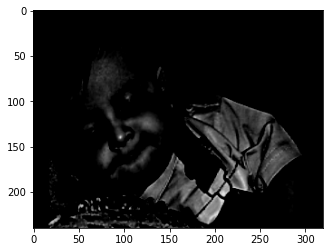

In [ ]:
plt.imshow(imgs_for_input[90])

In [ ]:
prediction = model_simple.predict(imgs_for_input)

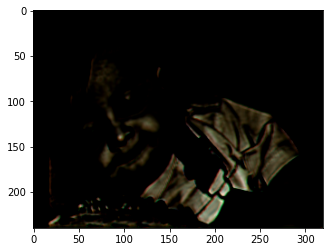

In [ ]:
plt.imshow(prediction[90])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


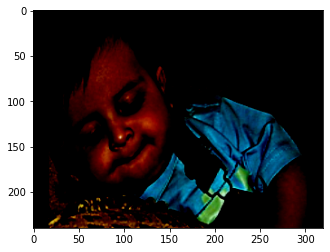

In [ ]:
plt.imshow(imgs_for_output[90])

In [ ]:
new_imgs_for_input = pipe_line_img(new_imgs_for_input, batch_size = frame)

In [ ]:
new_prediticions = model_simple.predict(new_imgs_for_input)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


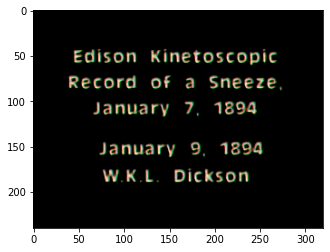

In [ ]:
plt.imshow(new_prediticions[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

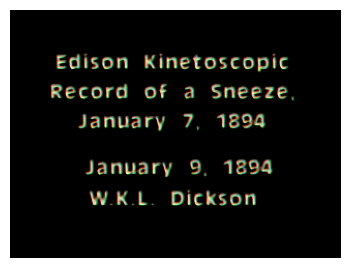

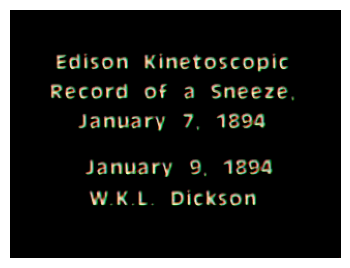

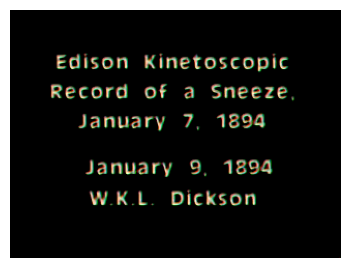

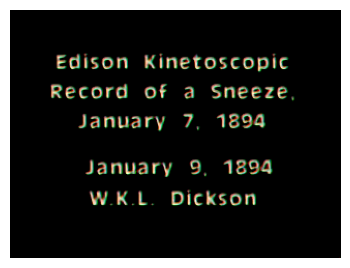

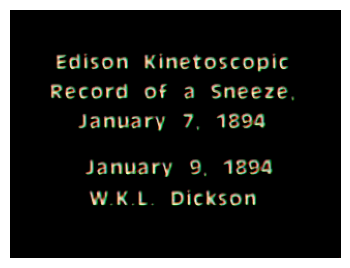

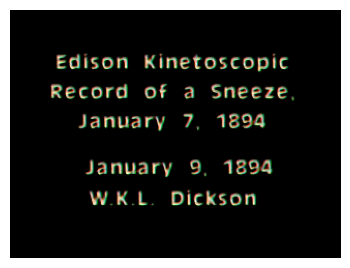

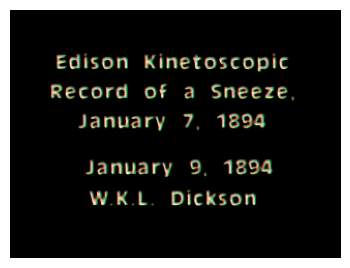

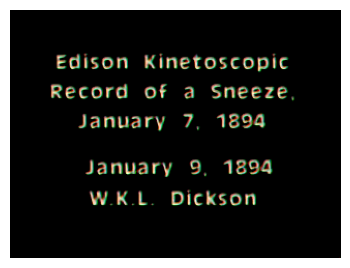

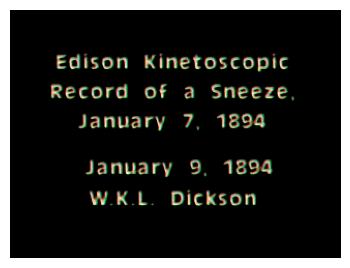

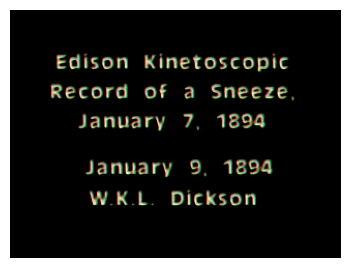

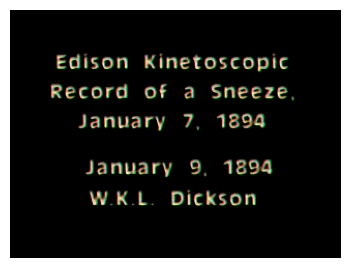

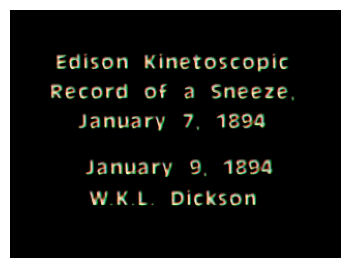

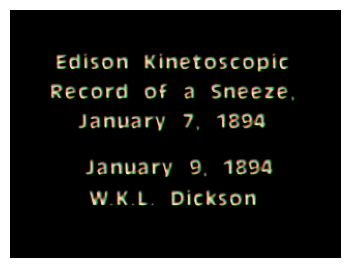

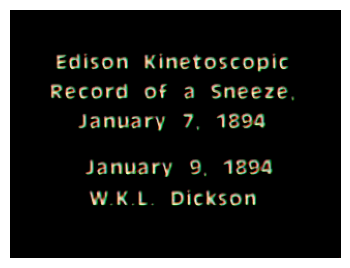

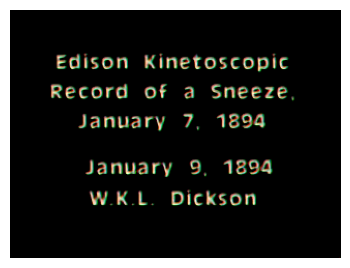

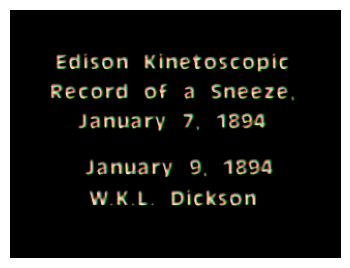

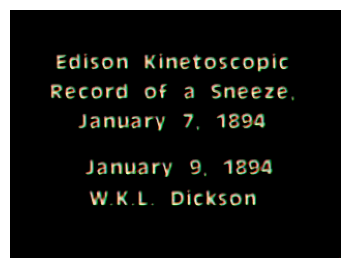

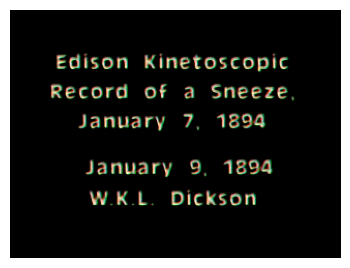

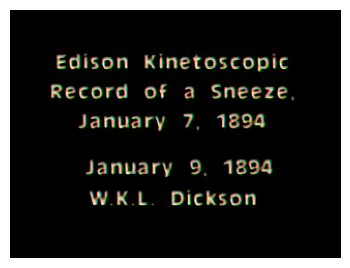

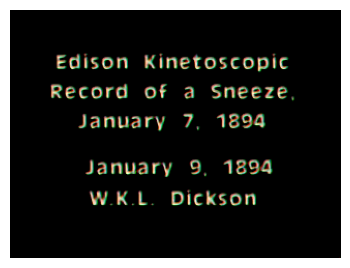

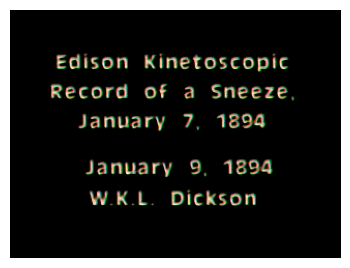

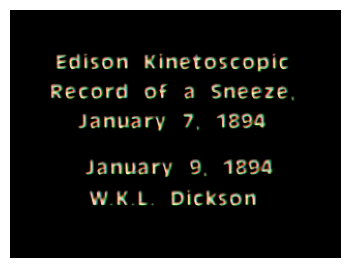

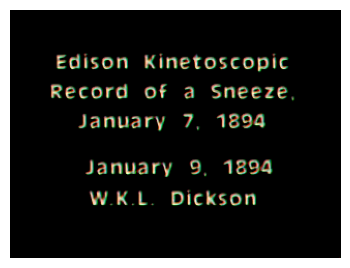

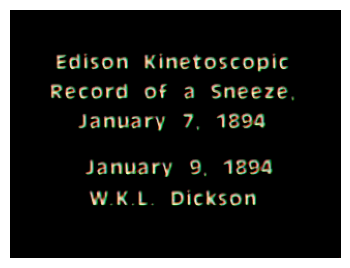

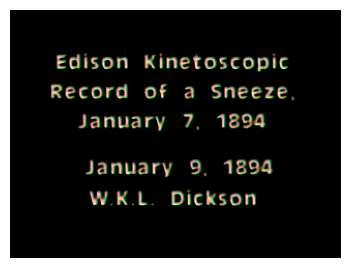

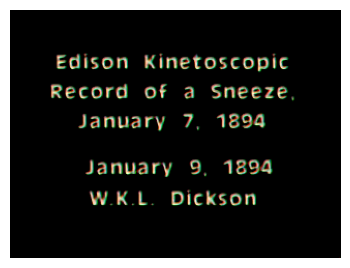

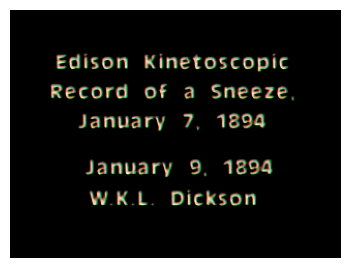

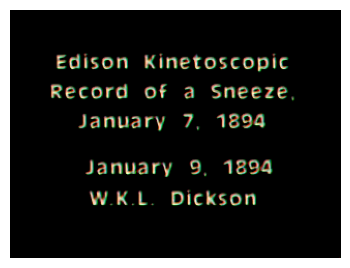

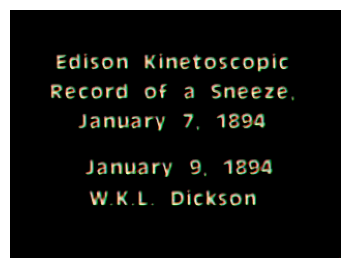

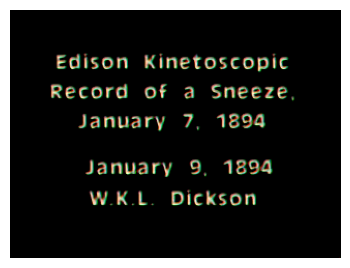

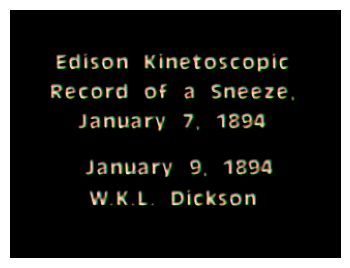

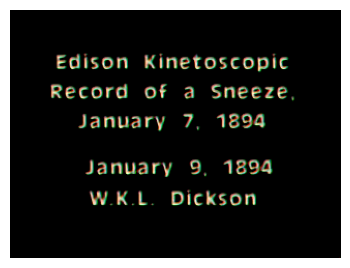

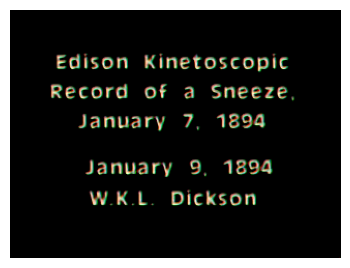

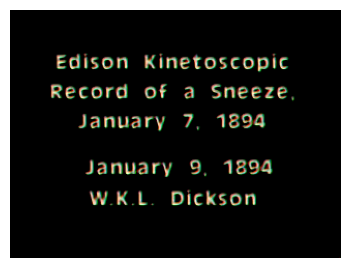

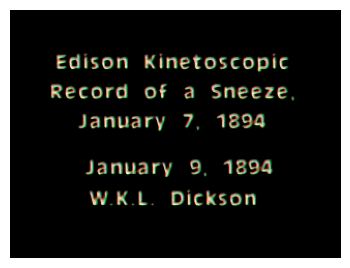

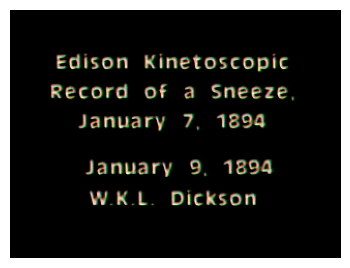

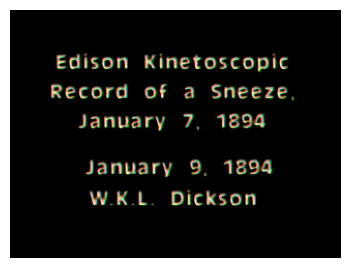

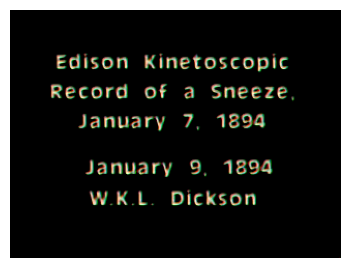

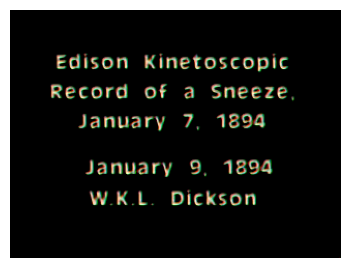

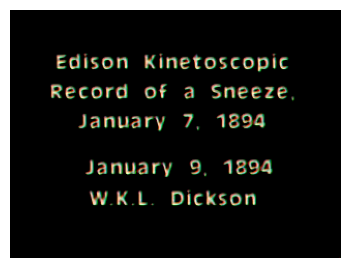

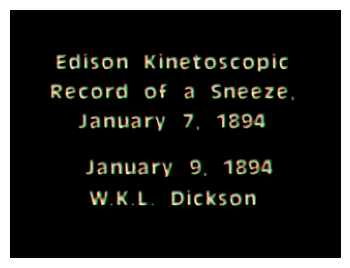

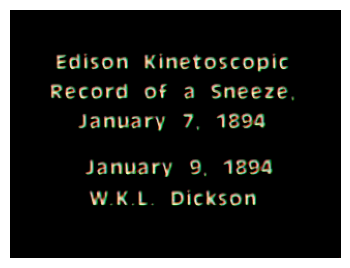

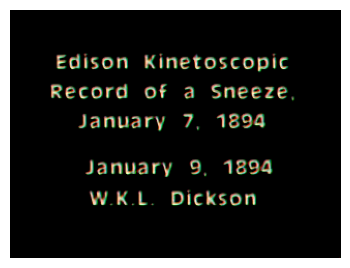

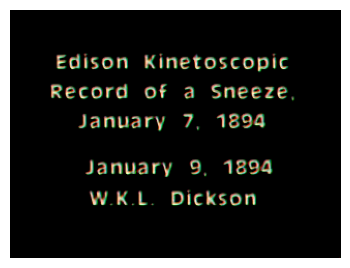

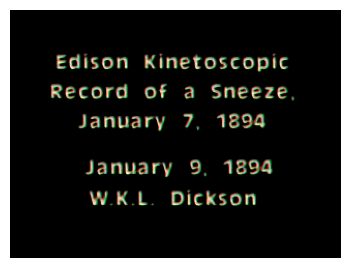

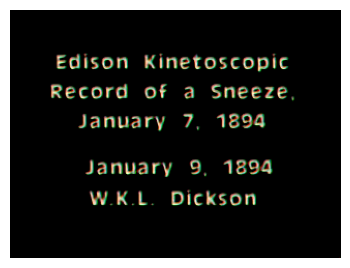

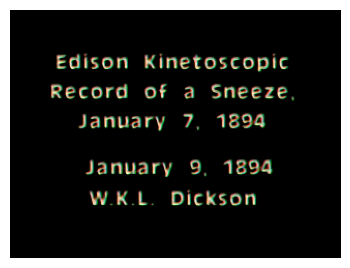

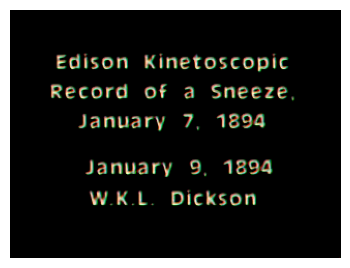

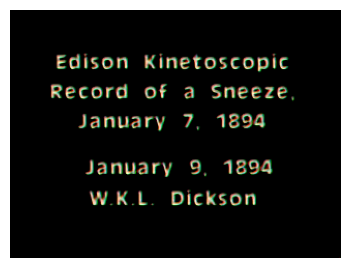

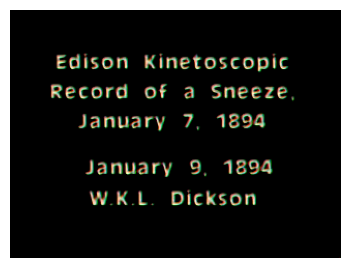

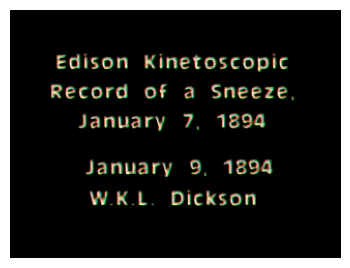

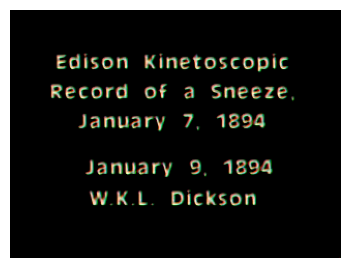

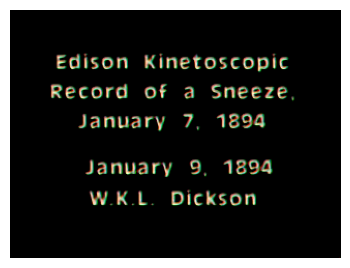

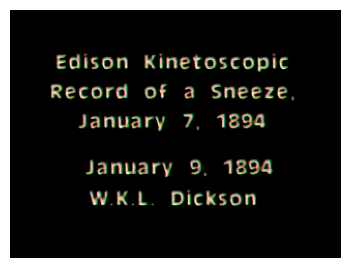

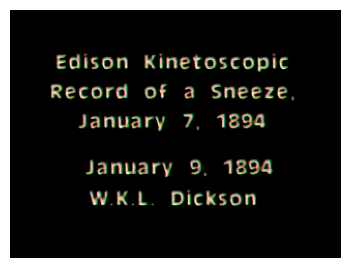

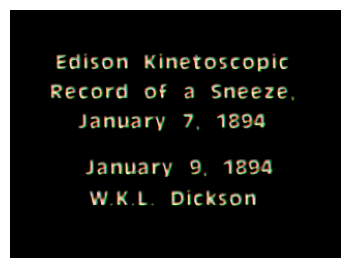

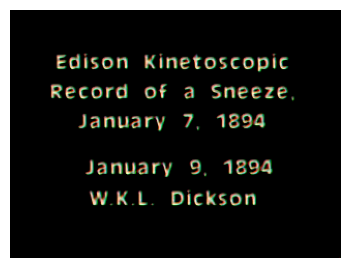

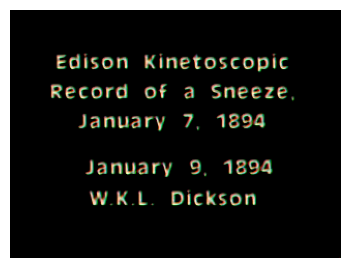

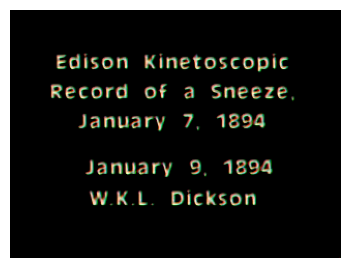

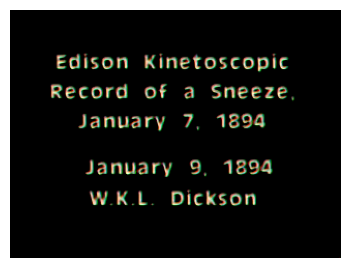

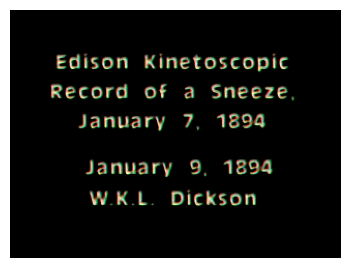

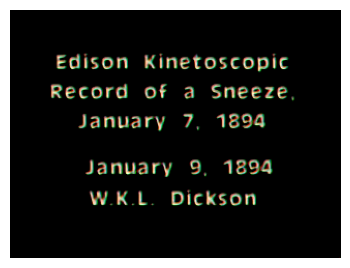

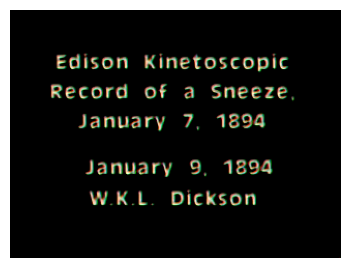

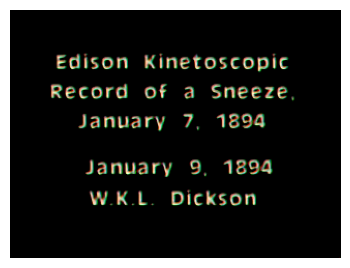

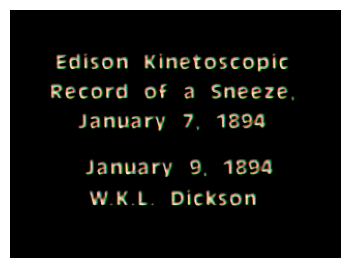

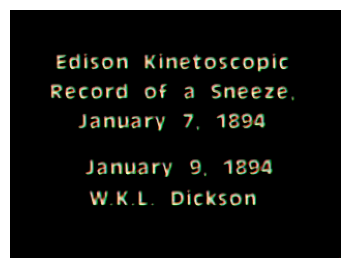

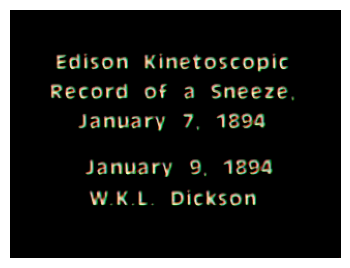

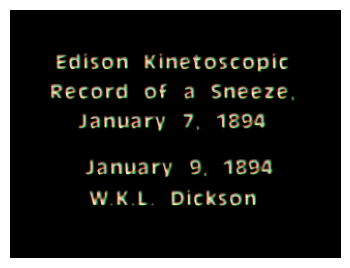

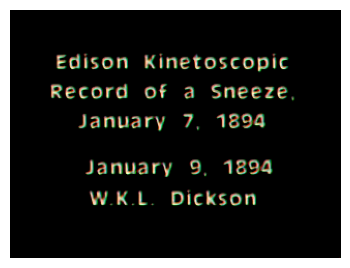

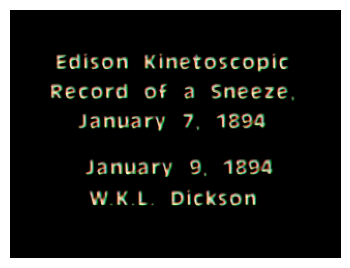

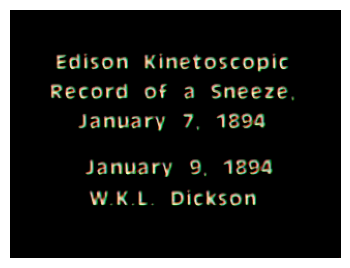

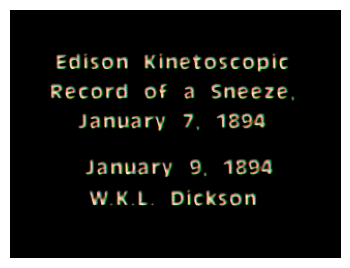

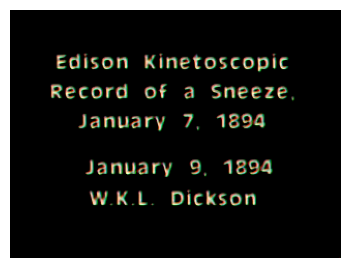

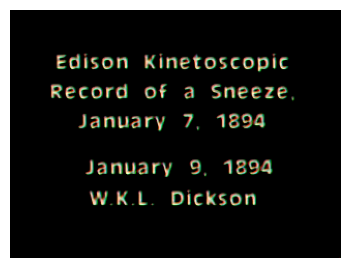

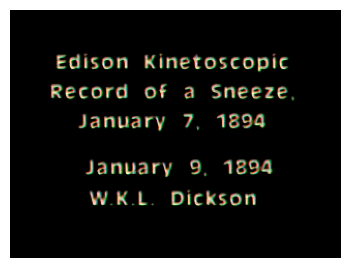

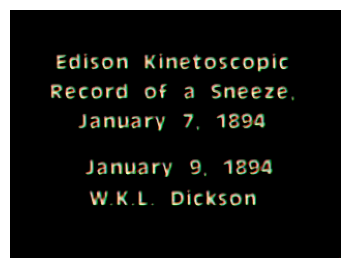

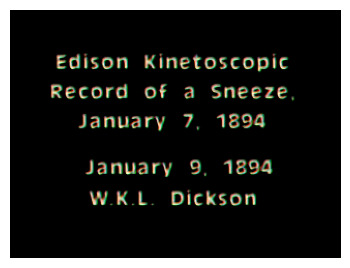

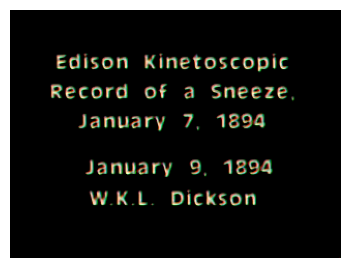

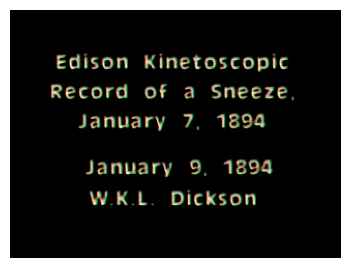

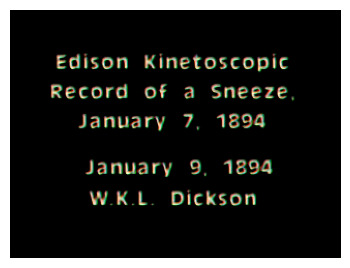

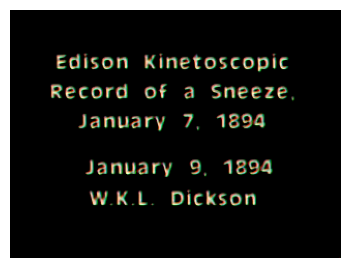

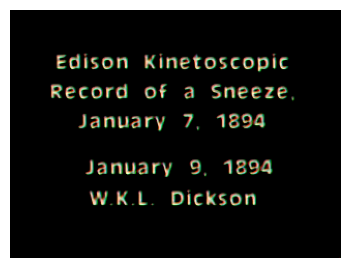

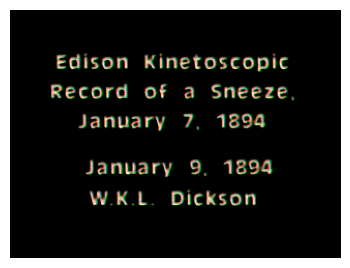

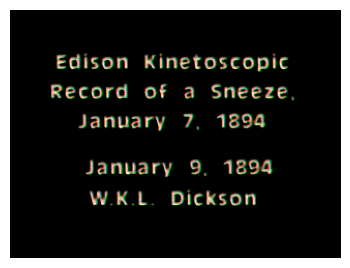

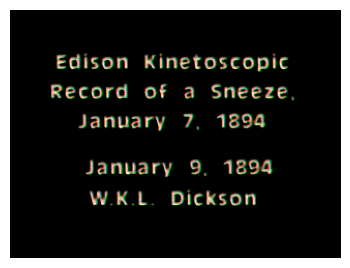

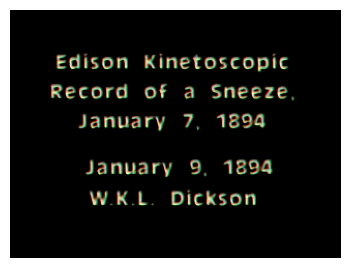

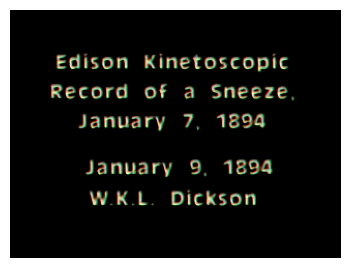

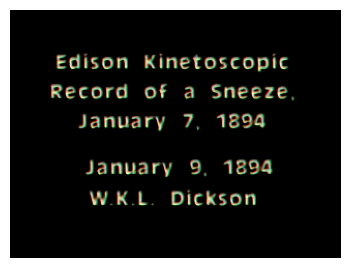

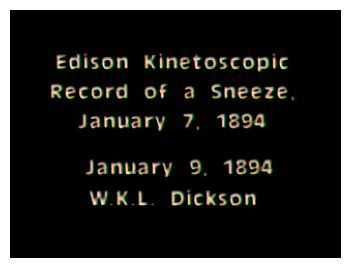

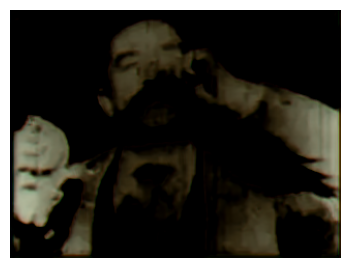

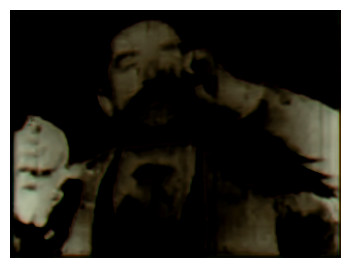

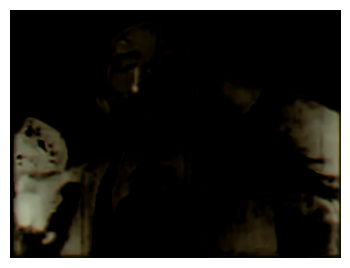

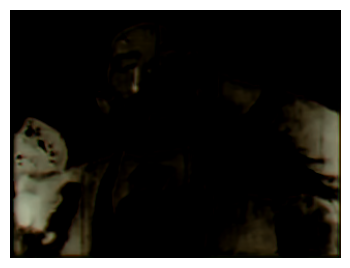

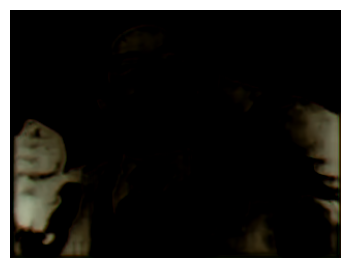

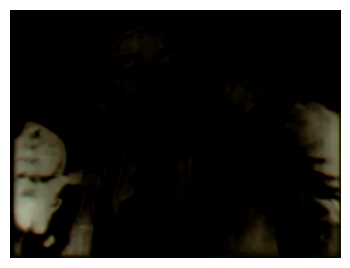

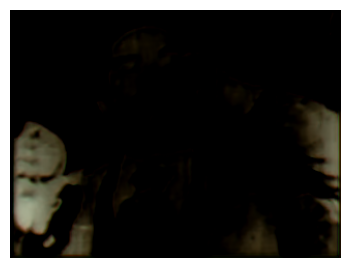

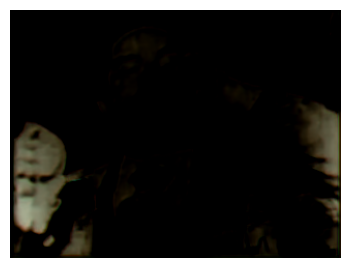

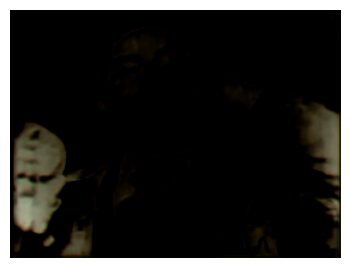

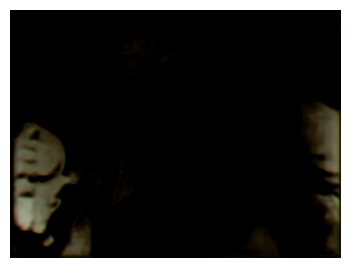

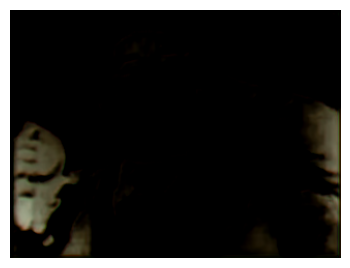

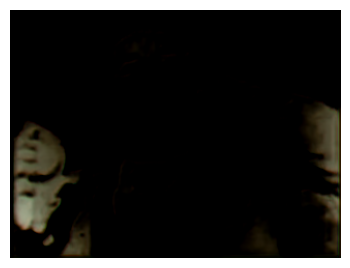

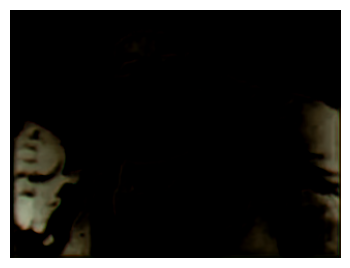

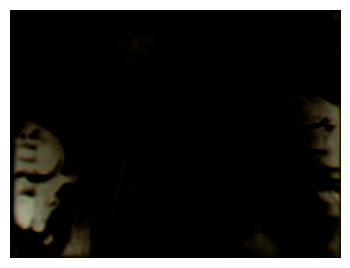

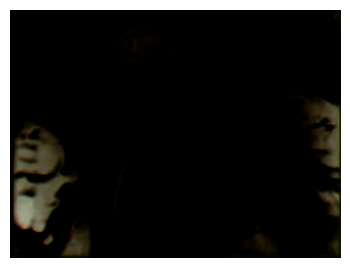

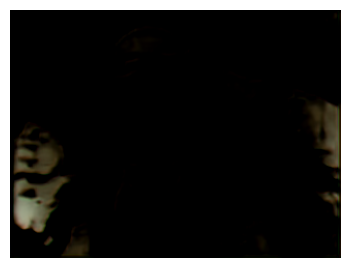

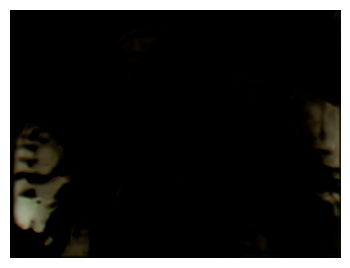

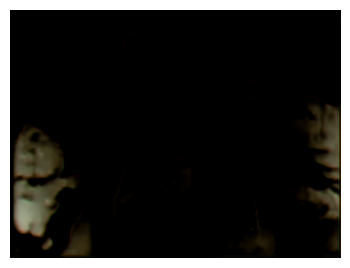

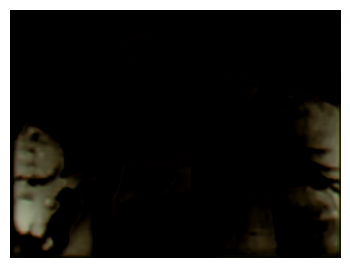

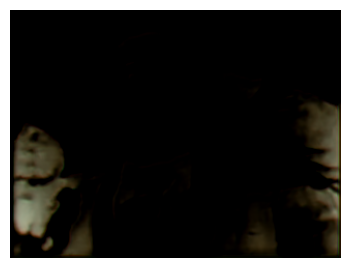

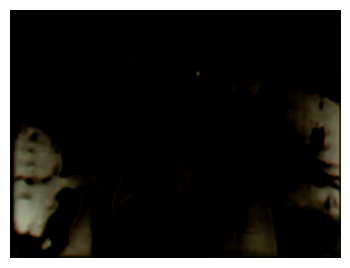

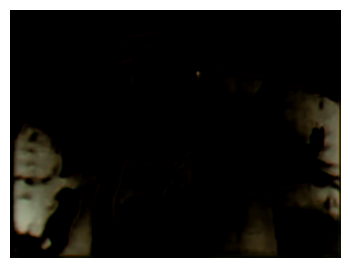

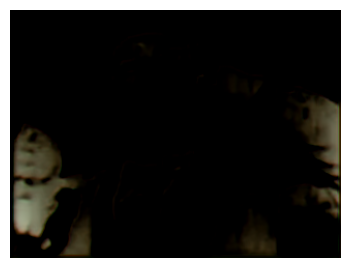

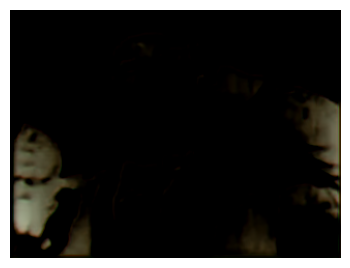

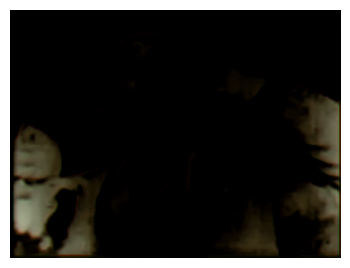

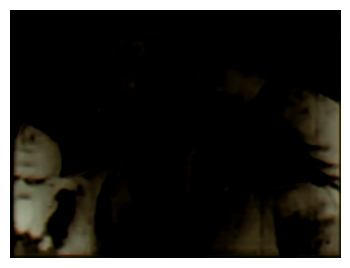

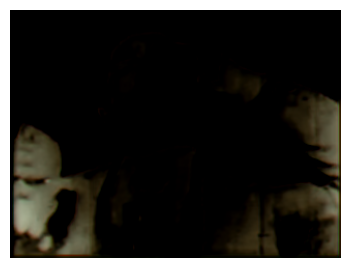

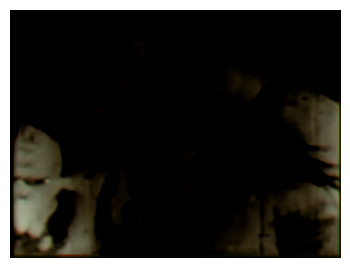

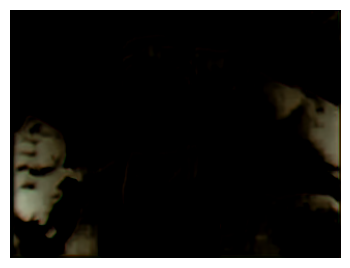

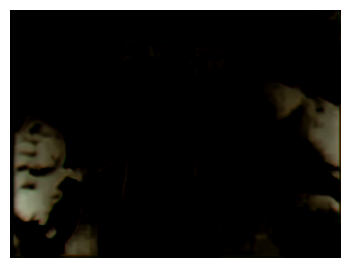

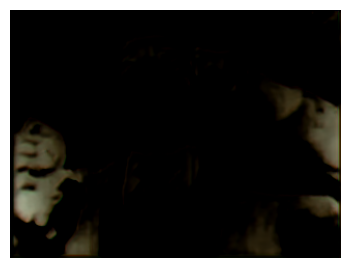

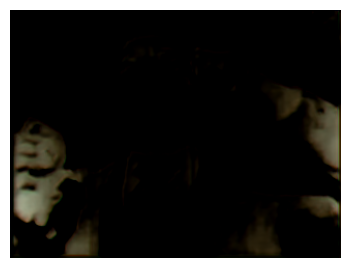

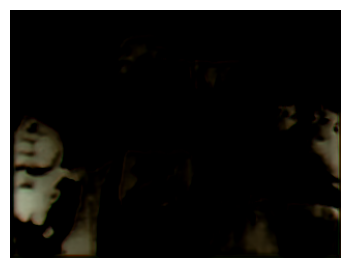

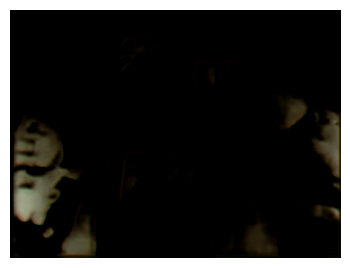

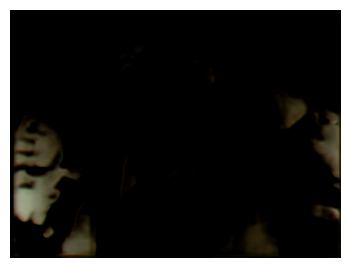

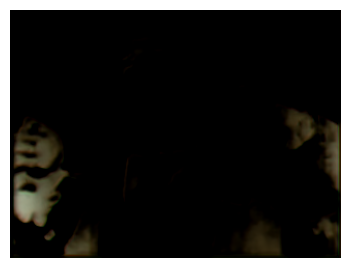

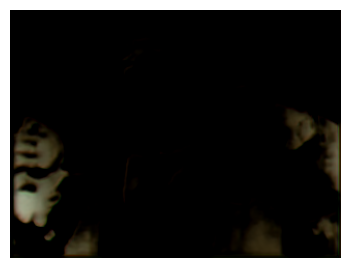

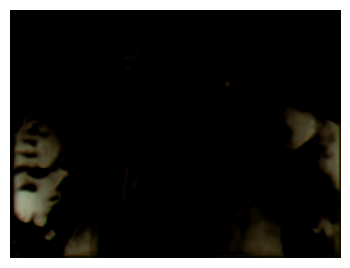

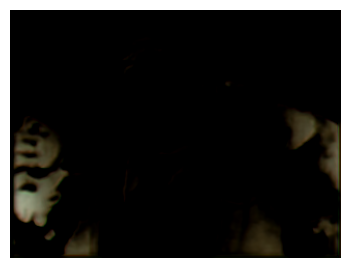

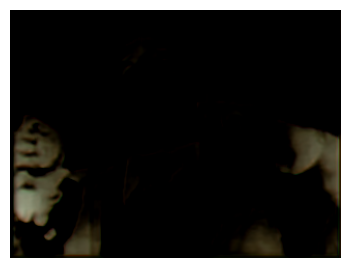

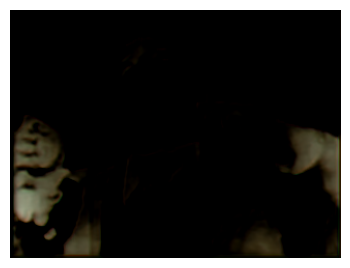

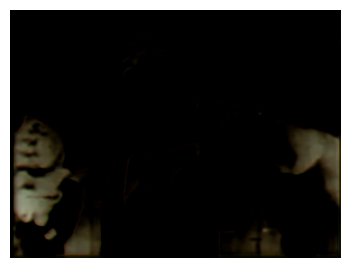

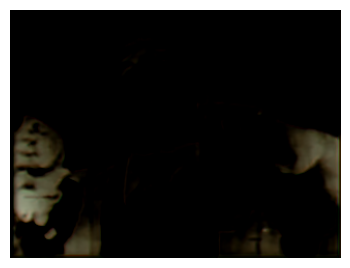

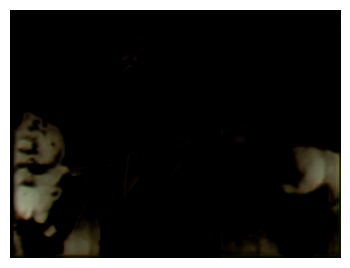

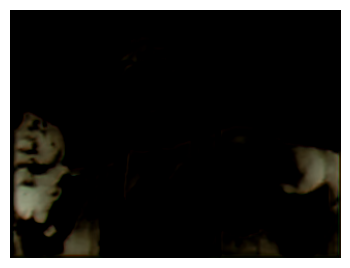

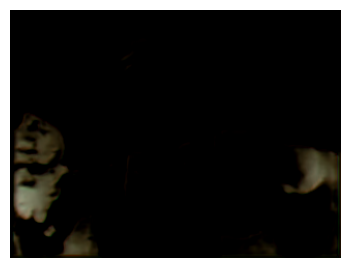

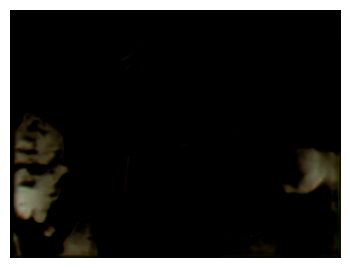

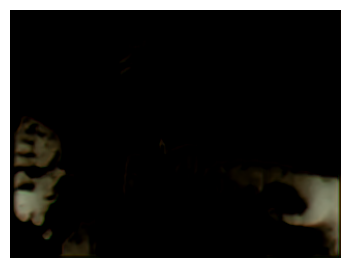

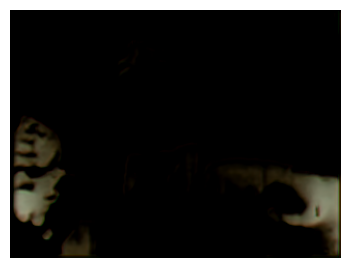

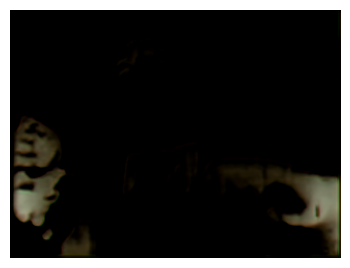

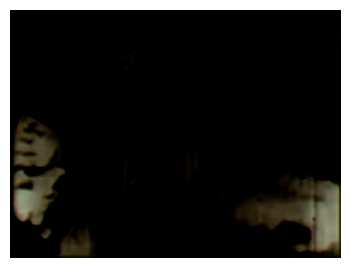

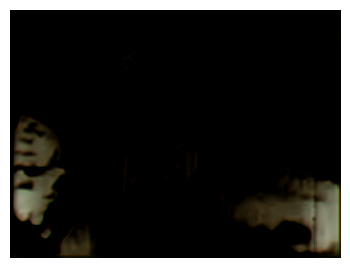

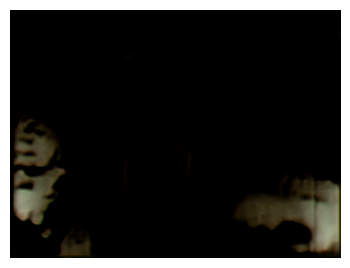

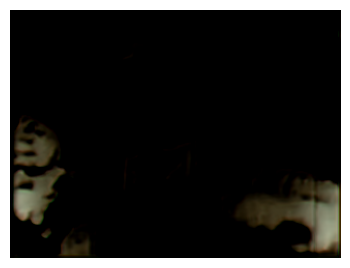

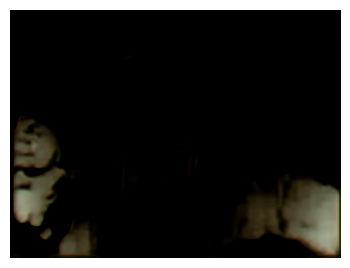

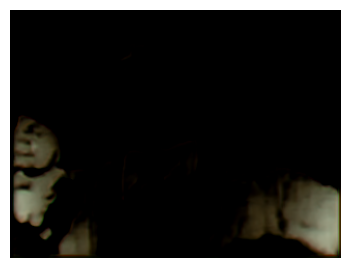

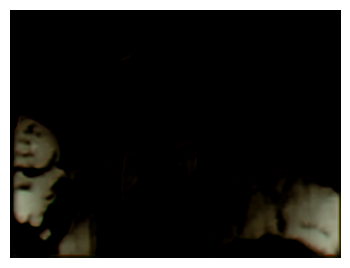

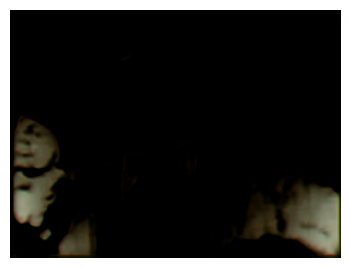

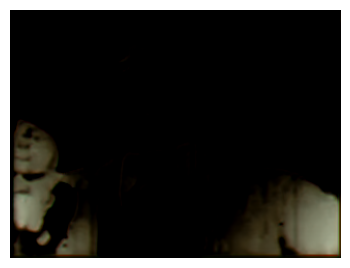

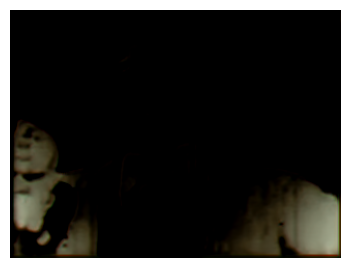

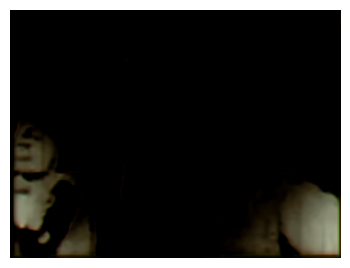

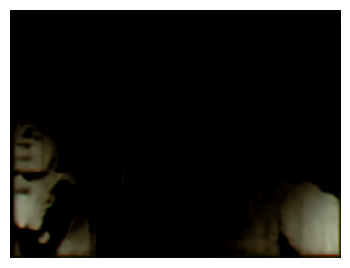

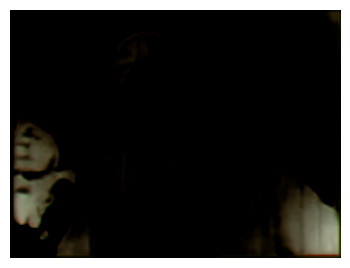

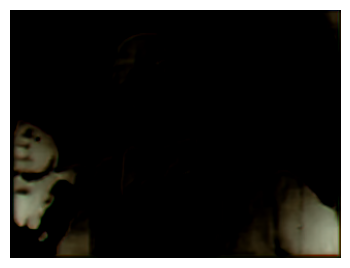

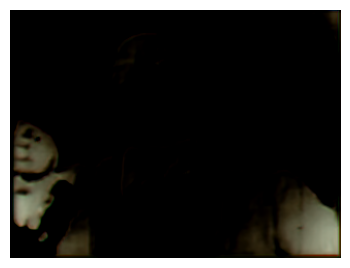

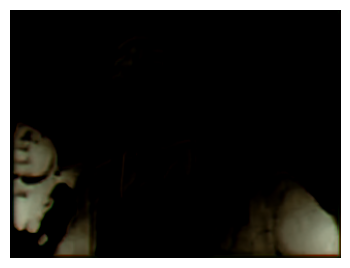

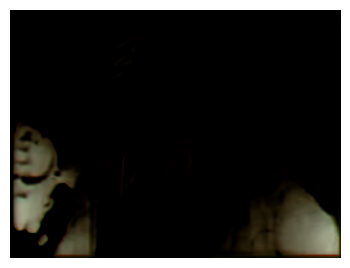

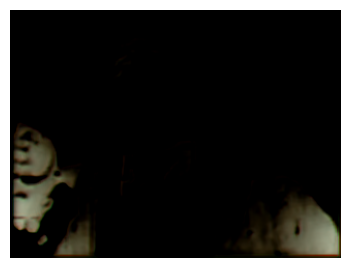

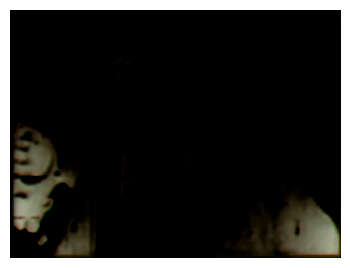

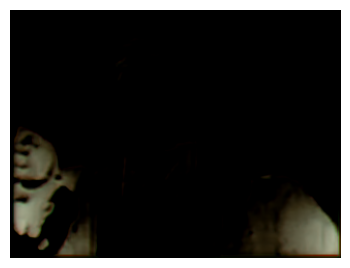

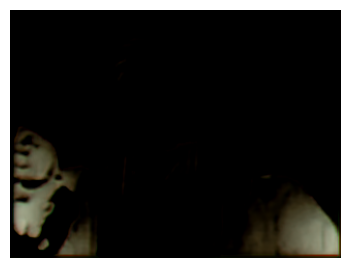

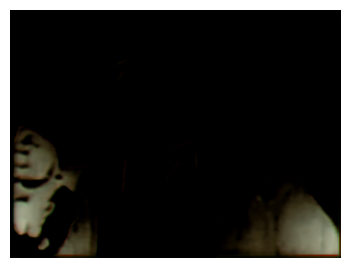

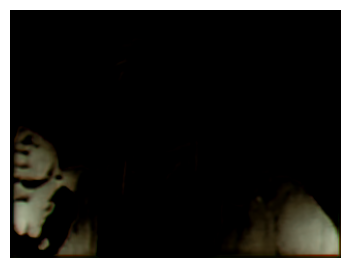

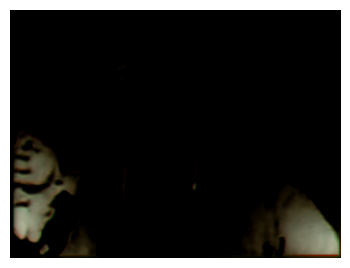

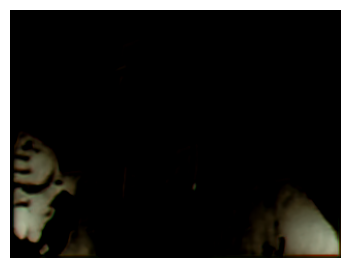

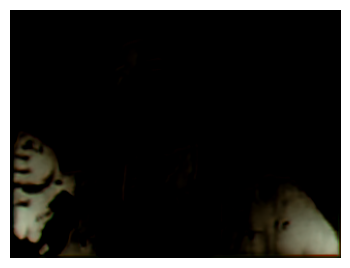

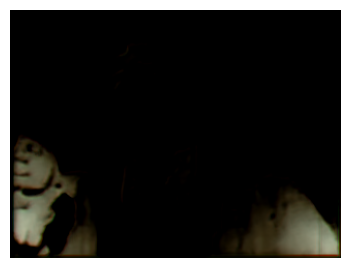

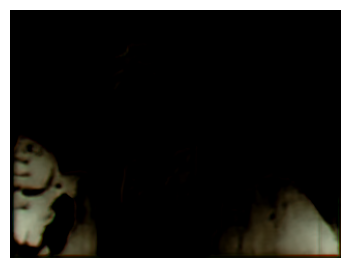

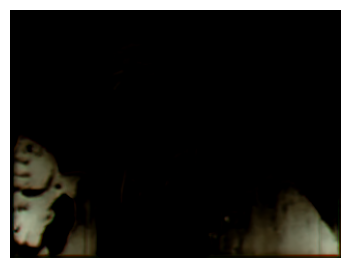

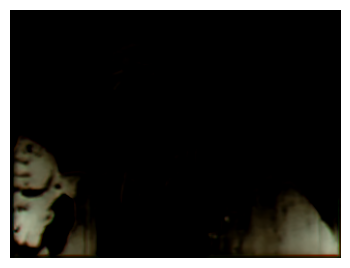

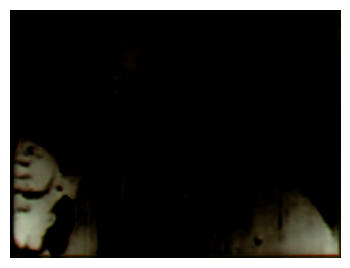

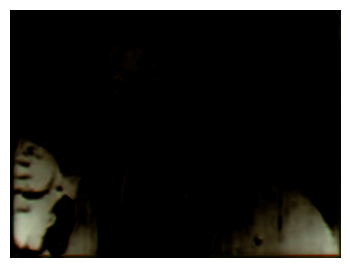

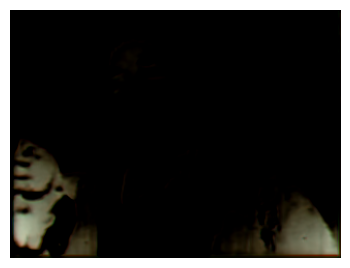

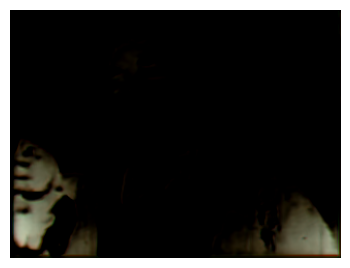

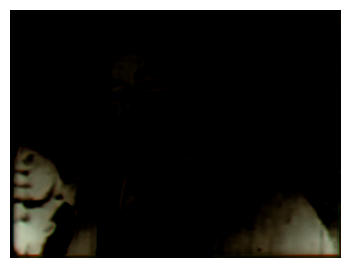

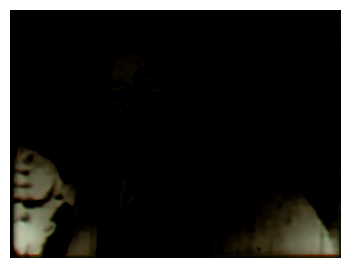

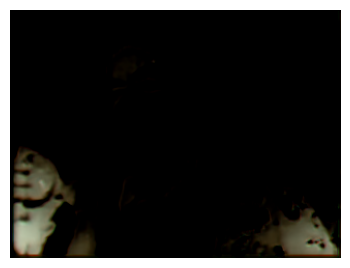

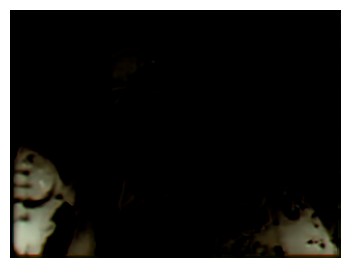

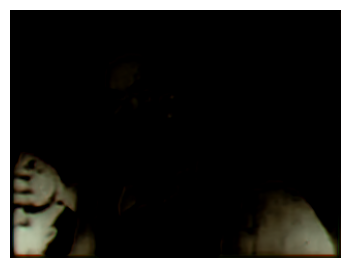

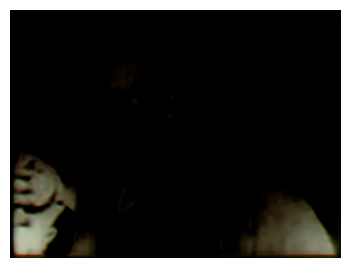

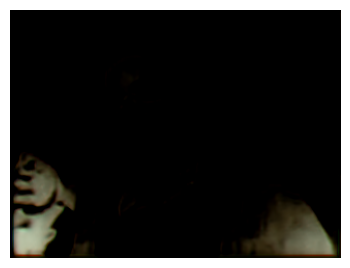

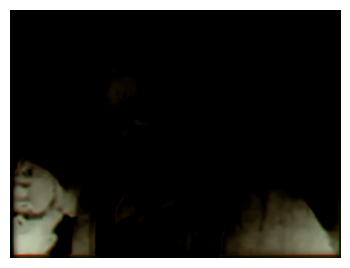

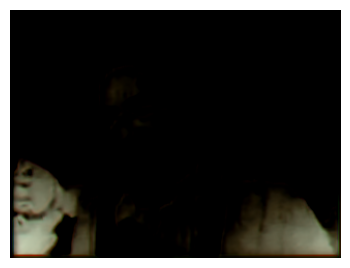

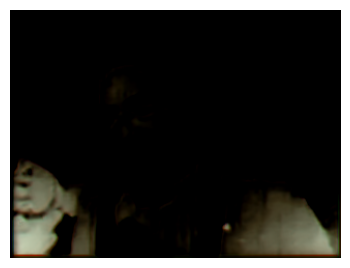

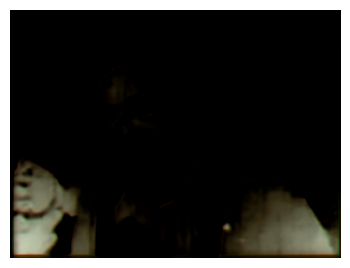

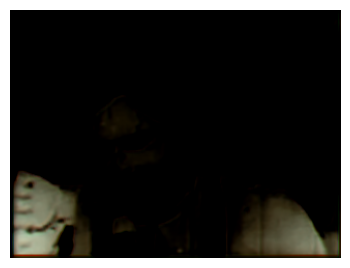

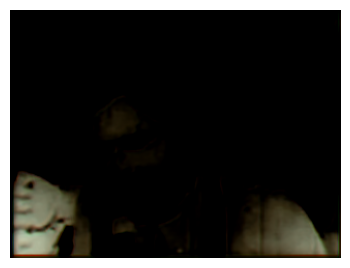

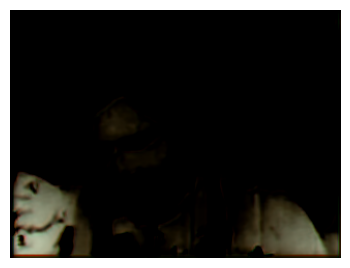

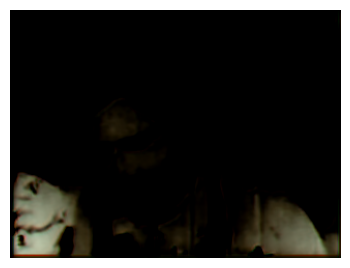

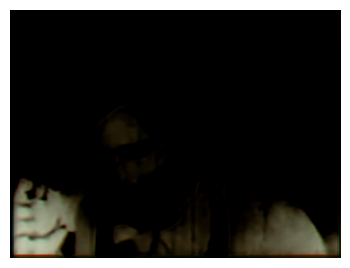

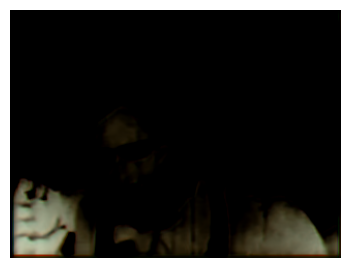

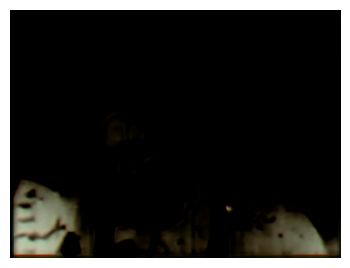

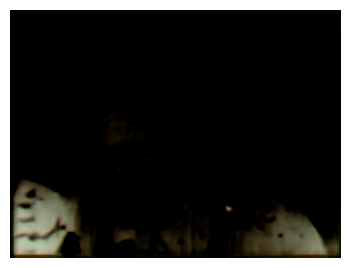

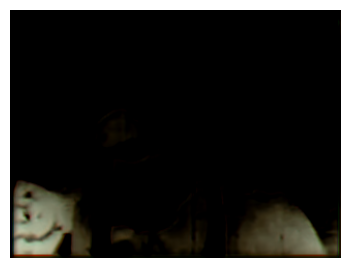

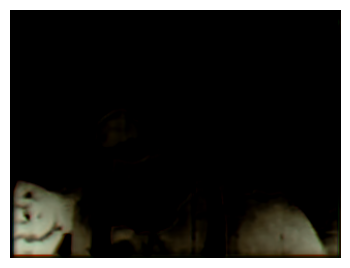

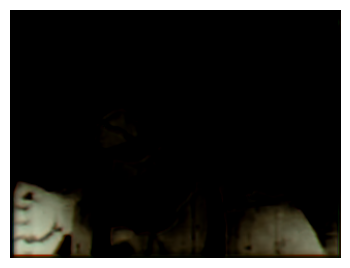

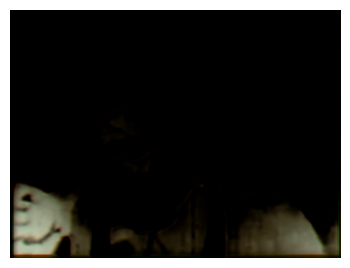

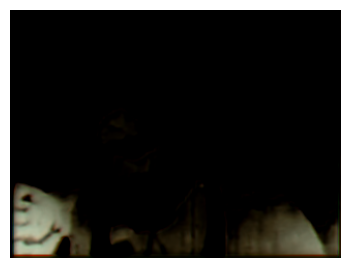

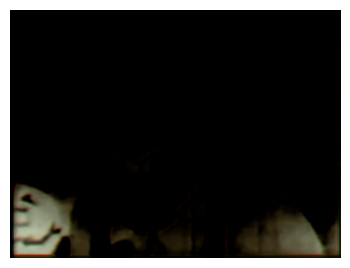

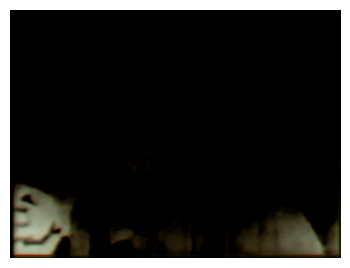

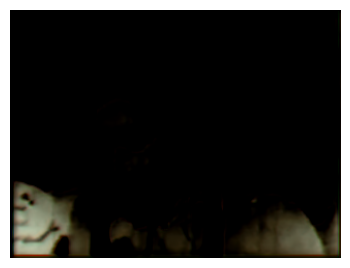

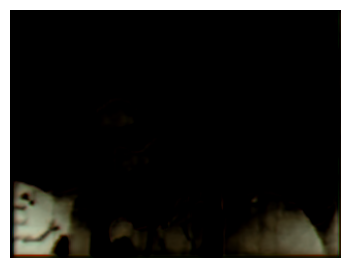

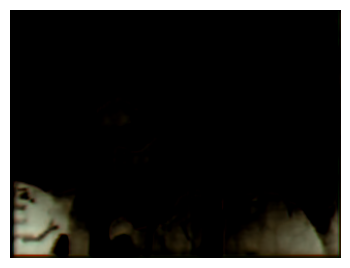

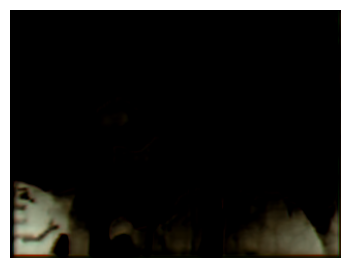

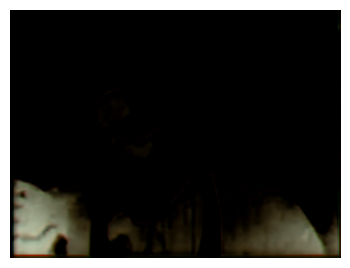

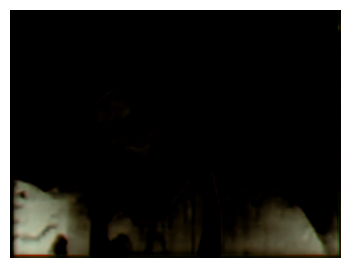

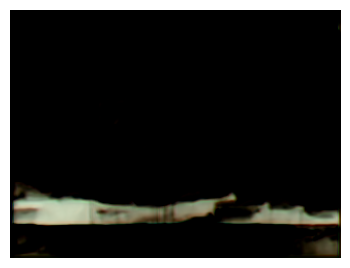

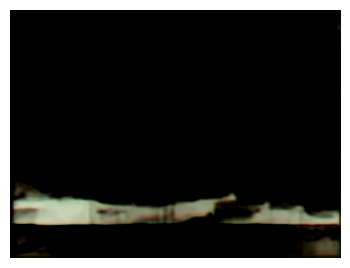

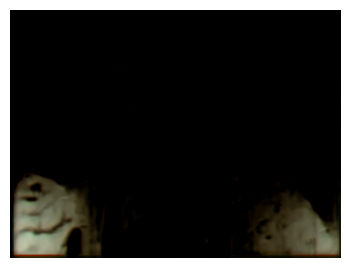

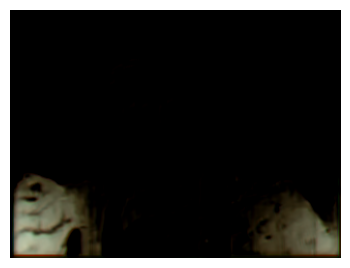

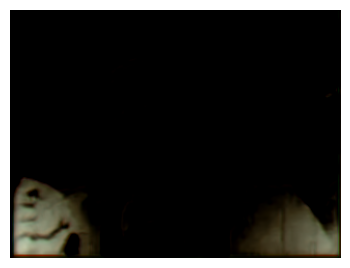

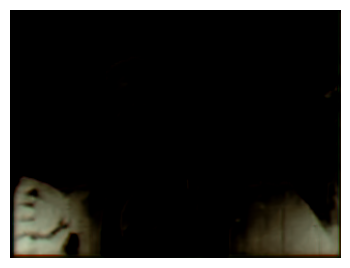

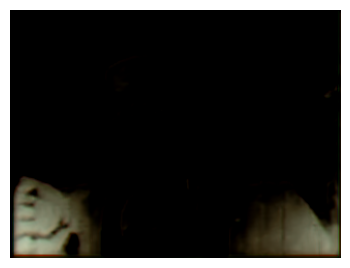

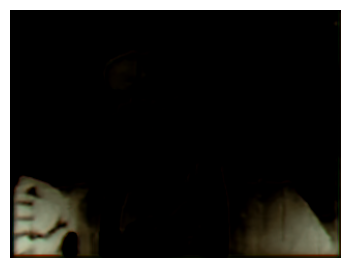

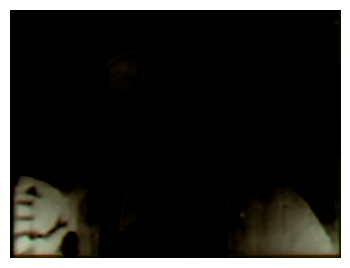

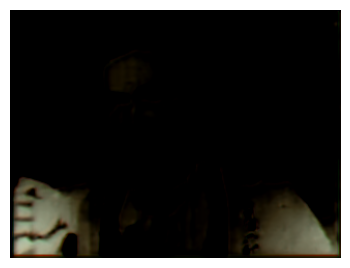

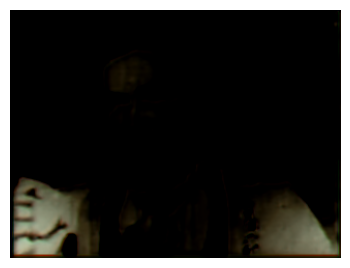

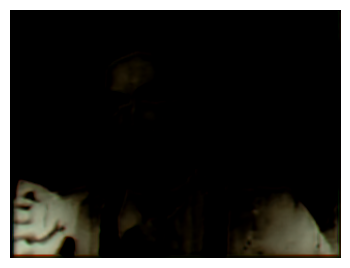

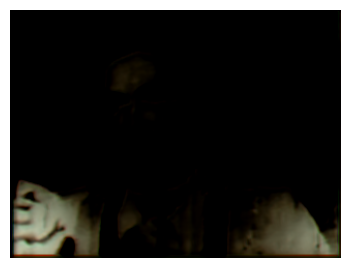

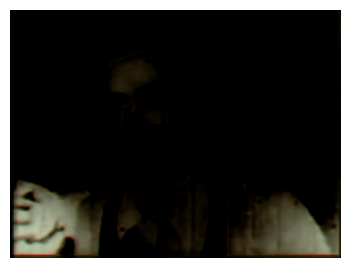

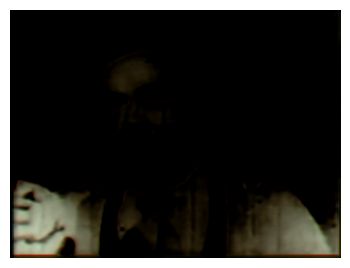

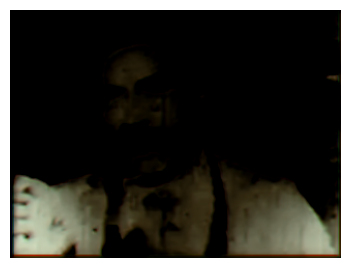

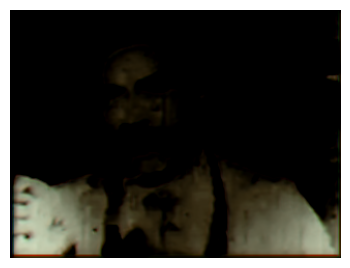

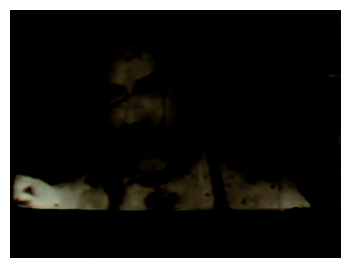

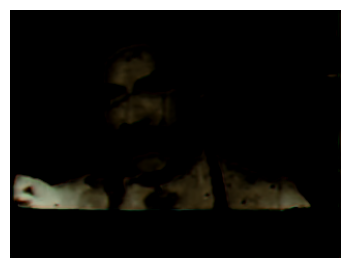

In [ ]:
count = 0
while count < new_prediticions.shape[0]:
    plt.figure(figsize=(new_imgs_for_input.shape[2]/73, new_imgs_for_input.shape[1]/73), dpi=100)
    plt.axis('off')
    plt.imshow(new_prediticions[count])
    plt.savefig(my_drive + "/Image Colorization/Video Output/Photos/" + str(count) + ".jpg", bbox_inches='tight',pad_inches = 0,dpi=100)
    count += 1
    